In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [109]:
df1=pd.read_csv('auto-mpg.csv')
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### A lot of Independent variables here, for now just consider the following 1 IV

In [110]:
df2=df1[['weight','mpg']]
df2.head()

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0


### For simplicity consider 100 data points

In [112]:
df2=df2.iloc[:100]
df2

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
95,4951,12.0
96,3821,13.0
97,3121,18.0
98,3278,16.0


### To check the types

In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  100 non-null    int64  
 1   mpg     100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


### To see the unique values in each feature

In [114]:
df2.nunique()

weight    96
mpg       23
dtype: int64

In [115]:
df2.corr()

,weight,mpg
weight,1.000000,-0.927748
mpg,-0.927748,1.000000


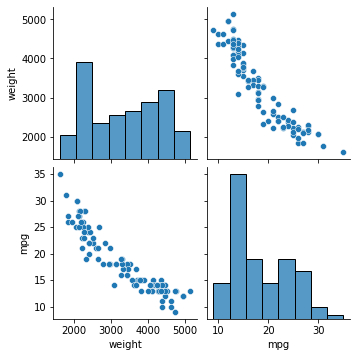

In [116]:
sns.pairplot(df2);

### Split the dataset into Independent variables and Dependent variables

In [117]:
X=df2[['weight']]
X.head()

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


In [118]:
y=df2[['mpg']]
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


### Standard scaler to scale down the weight values

In [119]:
scaler=StandardScaler()
scaler.fit(X)
X2=scaler.transform(X)
X2

array([[ 1.83083362e-01],
       [ 3.79522507e-01],
       [ 1.12406844e-01],
       [ 1.09288763e-01],
       [ 1.25918531e-01],
       [ 1.05302815e+00],
       [ 1.06653984e+00],
       [ 1.02288669e+00],
       [ 1.14033444e+00],
       [ 5.42702115e-01],
       [ 2.44405635e-01],
       [ 2.92216221e-01],
       [ 4.50199025e-01],
       [-2.51369351e-01],
       [-9.93472788e-01],
       [-5.14327572e-01],
       [-5.75649844e-01],
       [-7.70010269e-01],
       [-1.24499804e+00],
       [-1.55160941e+00],
       [-6.81664621e-01],
       [-9.33189876e-01],
       [-9.90354707e-01],
       [-1.13690455e+00],
       [-7.06609275e-01],
       [ 1.33781294e+00],
       [ 1.08940577e+00],
       [ 1.09564193e+00],
       [ 1.45941813e+00],
       [-1.24499804e+00],
       [-1.10572373e+00],
       [-1.14314071e+00],
       [-1.33230433e+00],
       [-7.21160322e-01],
       [ 1.15524926e-01],
       [ 1.19526464e-03],
       [-2.68674704e-02],
       [-4.14185182e-02],
       [ 9.1

### Splitting the dataset into training dataset and testing dataset

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,random_state=1)

### scaler.inverse_transform to use for plotting

In [159]:
X_train_unscaled=scaler.inverse_transform(X_train).flatten()
X_test_unscaled=scaler.inverse_transform(X_test).flatten()
X_test_unscaled

array([2395., 2100., 2634., 2288., 4237., 2587., 3302., 2506., 4456.,
       4129., 4363., 4464., 1955., 2065., 2074., 2046., 2228., 5140.,
       2979., 3563., 3436., 4098., 3121., 4274., 1835., 3329., 4735.,
       4382., 2408., 4209.])

# Models

### Linear Model

In [121]:
linear_model=LinearRegression()

In [122]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [123]:
linear_model.coef_,linear_model.intercept_

(array([[-5.40372251]]), array([18.3003857]))

In [124]:
linear_model.score(X_train,y_train) #score on train dataset

0.8521918011147902

In [125]:
linear_model.score(X_test,y_test) #score on test dataset

0.8748570235321607

In [126]:
linear_model_predictions=linear_model.predict(X_test).flatten()
linear_model_predictions

array([23.5396594 , 25.19650214, 22.19733597, 24.14061592, 13.19422106,
       22.46130752, 18.44557006, 22.91623722, 11.96422595, 13.80079399,
       12.48655264, 11.91929462, 26.01088246, 25.3930767 , 25.34252895,
       25.4997886 , 24.47760088,  8.12259737, 20.25967244, 16.97968547,
       17.69297031, 13.97490289, 19.46214136, 12.98641366, 26.68485239,
       18.29392682, 10.39724587, 12.37984073, 23.466646  , 13.35148071])

In [219]:
mean_squared_error(y_test,linear_model_predictions)

4.224826885554256

In [228]:
np.var(y_test).values[0]

33.76

#### Linear Regression on Training data set

Score on training dataset:  0.8521918011147902


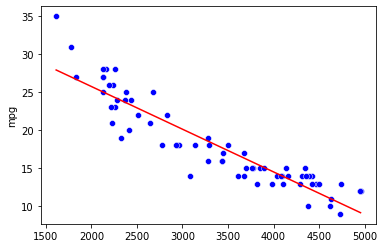

In [247]:
print('Score on training dataset: ',linear_model.score(X_train,y_train));
# print('Score on test dataset: ',linear_model.score(X_test,y_test));
sns.scatterplot(X_train_unscaled, y_train['mpg'], color='blue');
sns.lineplot(X_train_unscaled, linear_model.predict(X_train).flatten(),color='red');


# sns.scatterplot(X_test_unscaled, y_test['mpg'], color='red');
# sns.lineplot(X_test_unscaled, linear_model_predictions,color='red');

#### Linear Regression on Test data set

Score on test dataset:  0.8748570235321607


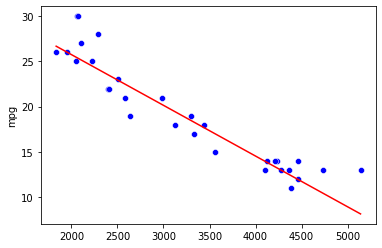

In [248]:
print('Score on test dataset: ',linear_model.score(X_test,y_test));
sns.scatterplot(X_test_unscaled, y_test['mpg'],color='blue');
sns.lineplot(X_test_unscaled, linear_model_predictions,color='red');

## Polynomial Model

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
poly_2=PolynomialFeatures(degree=2, include_bias=False)

In [137]:
X_train_poly_2=poly_2.fit_transform(X_train)
X_train_poly_2

array([[ 1.35652143e+00,  1.84015039e+00],
       [-3.97919189e-01,  1.58339681e-01],
       [-1.78234745e+00,  3.17676244e+00],
       [ 1.68703809e+00,  2.84609751e+00],
       [ 7.42259342e-01,  5.50948930e-01],
       [ 8.58667724e-01,  7.37310260e-01],
       [-1.96283241e-01,  3.85271108e-02],
       [-1.11611733e+00,  1.24571790e+00],
       [-1.13690455e+00,  1.29255194e+00],
       [ 1.15524926e-01,  1.33460085e-02],
       [ 3.57695936e-01,  1.27946382e-01],
       [-1.61604976e+00,  2.61161683e+00],
       [-8.49001671e-01,  7.20803837e-01],
       [-5.14327572e-01,  2.64532851e-01],
       [-1.20965978e+00,  1.46327679e+00],
       [ 7.98384812e-01,  6.37418308e-01],
       [-3.80250060e-01,  1.44590108e-01],
       [ 1.18086950e+00,  1.39445277e+00],
       [ 1.08940577e+00,  1.18680493e+00],
       [-5.18121238e-02,  2.68449617e-03],
       [ 1.47396917e+00,  2.17258513e+00],
       [-1.55264877e+00,  2.41071820e+00],
       [-7.06609275e-01,  4.99296667e-01],
       [ 1.

#### Power transformer to make the features normalize

In [139]:
pt_1=PowerTransformer()
pt_1.fit(X_train_poly_2)
X_train_poly_2=pt_1.transform(X_train_poly_2)
X_train_poly_2

array([[ 1.36628243,  1.11516398],
       [-0.46342857, -1.12568968],
       [-1.80416812,  1.97307284],
       [ 1.72529229,  1.79457785],
       [ 0.7088034 , -0.35639485],
       [ 0.83230755, -0.06805618],
       [-0.26180237, -1.42400033],
       [-1.16683114,  0.56289721],
       [-1.18690963,  0.61237854],
       [ 0.05486454, -1.49187391],
       [ 0.305113  , -1.19779707],
       [-1.64619454,  1.65665341],
       [-0.90754035, -0.09208865],
       [-0.57888747, -0.89024356],
       [-1.25707774,  0.78314539],
       [ 0.76828031, -0.21779756],
       [-0.44584605, -1.15803029],
       [ 1.17688783,  0.71603631],
       [ 1.07868454,  0.49889653],
       [-0.11588802, -1.52121335],
       [ 1.49347579,  1.36750107],
       [-1.58578433,  1.52980009],
       [-0.76826675, -0.44360975],
       [ 0.06553229, -1.48502103],
       [-1.29510105,  0.8741657 ],
       [-1.20095644,  0.6468389 ],
       [-0.98952855,  0.11696537],
       [ 0.64946034, -0.49329369],
       [ 0.04846723,

#### Model on polynomial normalized features

In [140]:
poly_2_model=LinearRegression()

In [141]:
poly_2_model.fit(X_train_poly_2,y_train)

LinearRegression()

In [142]:
poly_2_model.coef_,poly_2_model.intercept_

(array([[-5.29788847,  1.36791134]]), array([18.1]))

In [143]:
poly_2_model.score(X_train_poly_2,y_train)

0.9002708343337361

In [146]:
X_test_poly=pt_1.transform(poly_2.fit_transform(X_test))

In [147]:
poly_2_model.score(X_test_poly,y_test)

0.9098805961418749

#### Degree-2 Polynomial Regression on Training dataset

Score on train dataset:  0.9002708343337361


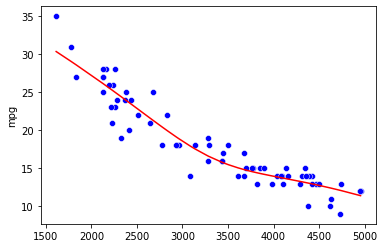

In [250]:
print('Score on train dataset: ',poly_2_model.score(X_train_poly_2,y_train));
# print('Score on test dataset: ',poly_2_model.score(X_test_poly,y_test));

sns.scatterplot(X_train_unscaled, y_train['mpg'],color='blue');
sns.lineplot(X_train_unscaled, poly_2_model.predict(X_train_poly_2).flatten(),color='red');

# sns.scatterplot(X_test_unscaled, y_test['mpg'], color='red');
# sns.lineplot(X_test_unscaled, poly_2_model.predict(X_test_poly).flatten(),color='red');

#### Degree-2 Polynomial Regression on Test dataset

Score on test dataset:  0.9098805961418749


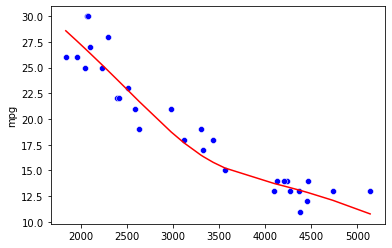

In [273]:
print('Score on test dataset: ',poly_2_model.score(X_test_poly,y_test));
sns.scatterplot(X_test_unscaled, y_test['mpg'],color='blue')
sns.lineplot(X_test_unscaled, poly_2_model.predict(X_test_poly).flatten(),color='red');

## Why normalization?

In [318]:
from scipy.stats import skew

In [293]:
len(X_train)

70

In [322]:
poly_3=PolynomialFeatures(degree=20, include_bias=False)
X_train_poly_3=poly_3.fit_transform(X_train)

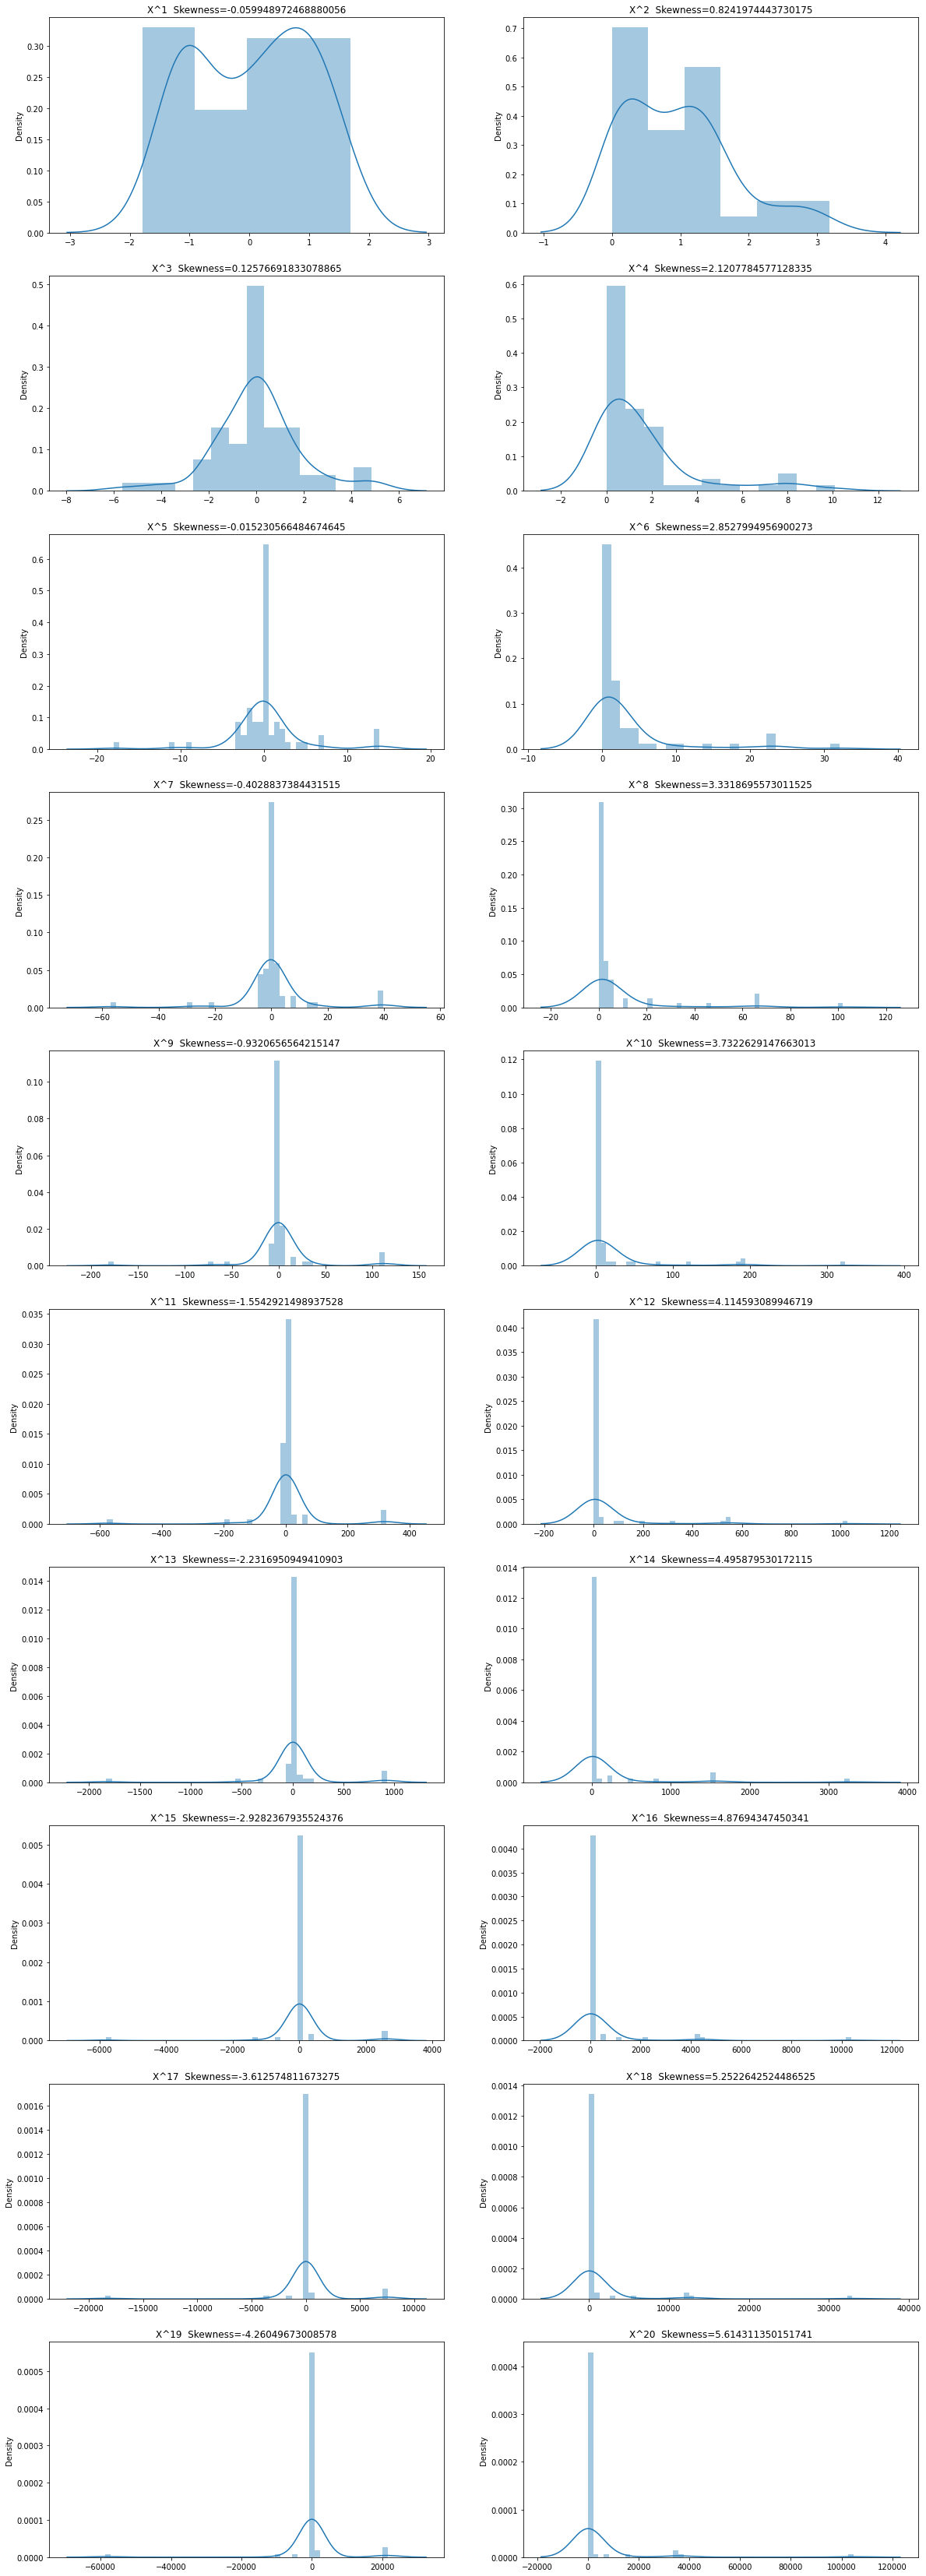

In [324]:
plt.figure(figsize=(20,60))
for i in range(20):
    plt.subplot(10,2,i+1)
    sns.distplot(X_train_poly_3[:,i]).set(title='X^'+str(i+1)+'  Skewness='+str(skew(X_train_poly_3[:,i])));

In [ ]:
#Plots after Normalization

In [325]:
pt_3=PowerTransformer()
X_train_poly_3=pt_3.fit_transform(X_train_poly_3)
X_train_poly_3

array([[ 1.36628243,  1.11516398,  1.34801676, ...,  1.48814001,
        -0.0105427 ,  1.49506735],
       [-0.46342857, -1.12568968, -0.04482199, ..., -0.90084841,
        -0.05924503, -0.89164058],
       [-1.80416812,  1.97307284, -3.33250418, ...,  1.83147964,
        -5.67156366,  1.83033326],
       ...,
       [ 0.54430506, -0.72918824,  0.1029145 , ..., -0.90078325,
        -0.05924503, -0.89162025],
       [ 0.4015624 , -1.02440489,  0.04147111, ..., -0.90084791,
        -0.05924503, -0.89164049],
       [-0.10533861, -1.52389819, -0.00955412, ..., -0.90084847,
        -0.05924503, -0.89164059]])

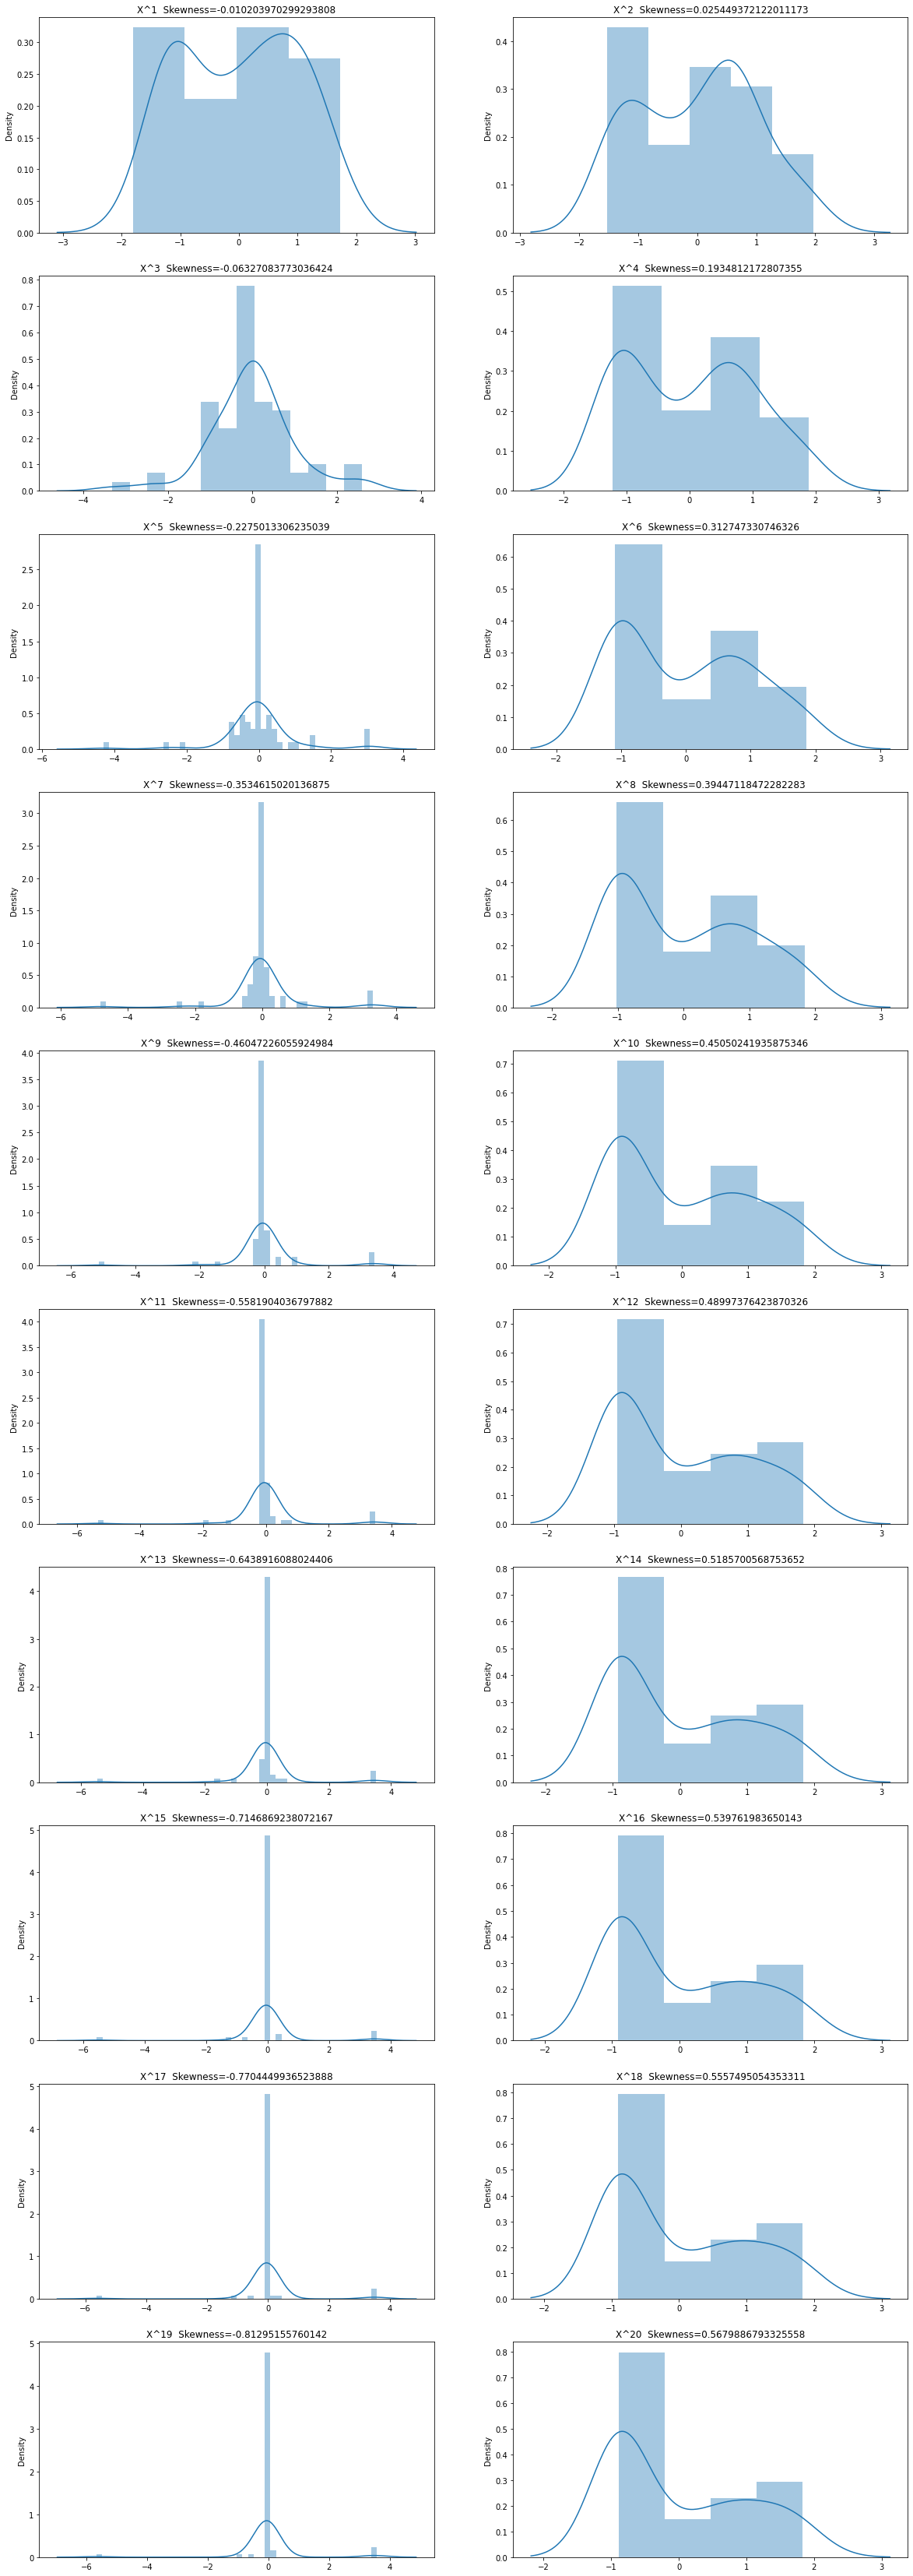

In [326]:
plt.figure(figsize=(20,60))
for i in range(20):
    plt.subplot(10,2,i+1)
    sns.distplot(X_train_poly_3[:,i]).set(title='X^'+str(i+1)+'  Skewness='+str(skew(X_train_poly_3[:,i])));

### Polynomial Regression Function

In [151]:
len(X_train)

70

In [275]:
def polynomial_models_with_transformation(d):
    
    
    #polynomial features
    poly=PolynomialFeatures(degree=d, include_bias=False)
    poly.fit(X_train)
    X_train_poly=poly.transform(X_train)
    
    #normalization
    pt=PowerTransformer()
    pt.fit(X_train_poly)
    X_train_poly=pt.transform(X_train_poly)
    
    
    #model
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,y_train)
    
    
    
    print('******** Polynomial Model with Degree=',d,' ********\n\n')
    
    print('Coefficients= ',poly_model.coef_)
    
    print('Intercept= ',poly_model.intercept_)
    
    
    plt.figure(figsize=(20,8))
    
    
    score_train_dataset=poly_model.score(X_train_poly,y_train);
    
    
    print('\n\nScore on train-dataset= ',score_train_dataset,'\n\n')
    
    X_test_poly= pt.transform(poly.transform(X_test))
    
    score_test_dataset=poly_model.score(X_test_poly,y_test);
    
    print('Score on test-dataset= ',score_test_dataset,'\n\n')
    mse_test_dataset=mean_squared_error(y_test,poly_model.predict(X_test_poly));
    print('MSE-Mean Squared Error= ',mse_test_dataset);
    print('Variance of mpg(y_test)= ',np.var(y_test).values[0]);
    
    plt.subplot(1,2,1)
    
    plt.title('Model Degree-'+str(d)+' Train Data Points')
    
    sns.scatterplot(X_train_unscaled, y_train['mpg'],color='blue');
    
    sns.lineplot(X_train_unscaled, poly_model.predict(X_train_poly).flatten(),color='red');
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    plt.subplot(1,2,2)
    
    plt.title('Model Degree-'+str(d)+' Test Data Points')
    
    sns.scatterplot(X_test_unscaled, y_test['mpg'],color='blue');
    
    sns.lineplot(X_test_unscaled, poly_model.predict(X_test_poly).flatten(),color='red');
    
    
    return d,score_train_dataset,score_test_dataset,mse_test_dataset


******** Polynomial Model with Degree= 1  ********


Coefficients=  [[-5.27413091]]
Intercept=  [18.1]


Score on train-dataset=  0.8435437234312617 


Score on test-dataset=  0.8673677729431606 


MSE-Mean Squared Error=  4.4776639854389
Variance of mpg(y_test)=  33.76
******** Polynomial Model with Degree= 2  ********


Coefficients=  [[-5.29788847  1.36791134]]
Intercept=  [18.1]


Score on train-dataset=  0.9002708343337361 


Score on test-dataset=  0.9098805961418749 


MSE-Mean Squared Error=  3.0424310742503025
Variance of mpg(y_test)=  33.76
******** Polynomial Model with Degree= 3  ********


Coefficients=  [[-4.34641196  1.38680045 -1.05850948]]
Intercept=  [18.1]


Score on train-dataset=  0.9067651198323884 


Score on test-dataset=  0.8908211442913908 


MSE-Mean Squared Error=  3.685878168722647
Variance of mpg(y_test)=  33.76
******** Polynomial Model with Degree= 4  ********


Coefficients=  [[-4.32353276  0.83821457 -1.07864152  0.55447067]]
Intercept=  [18.1]


Score

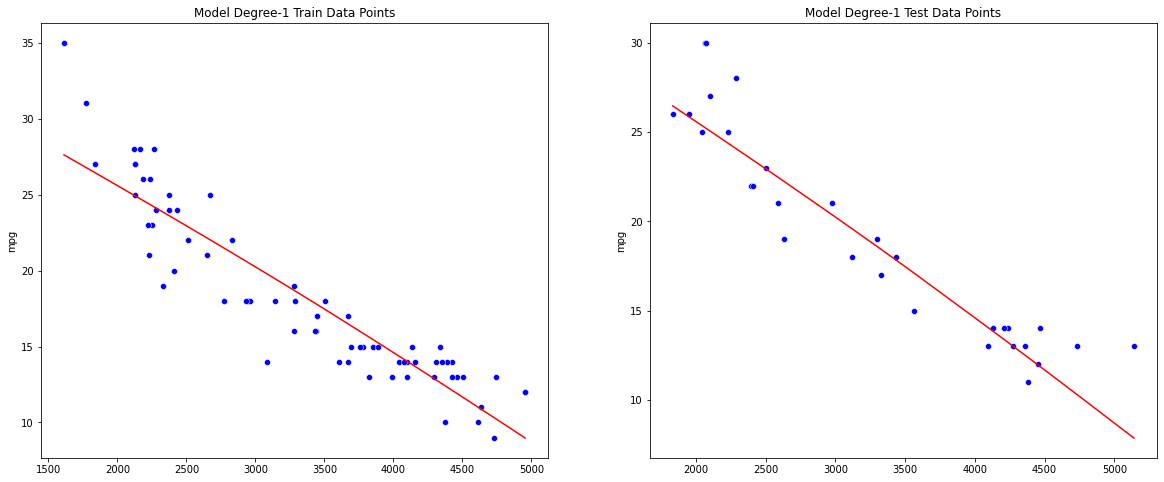

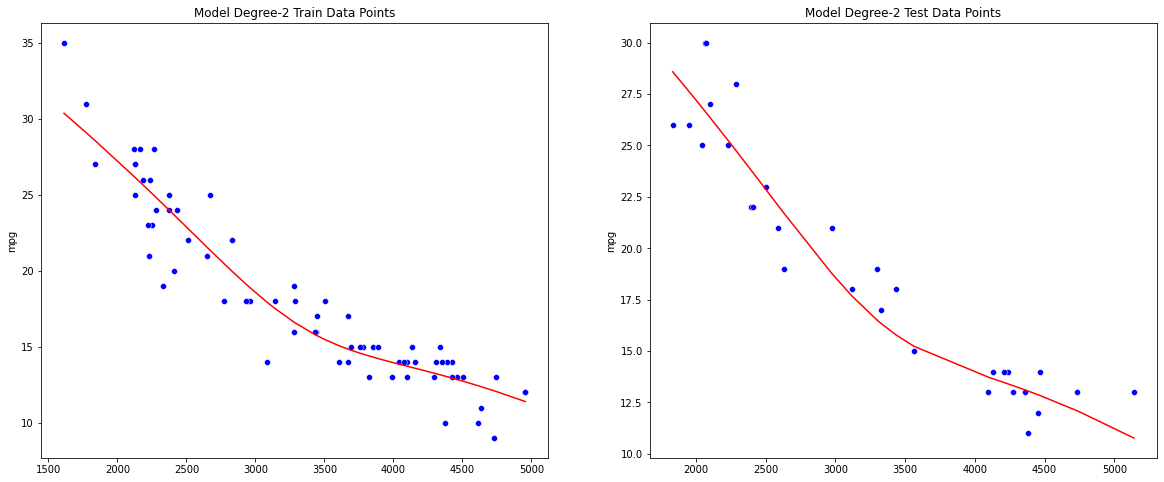

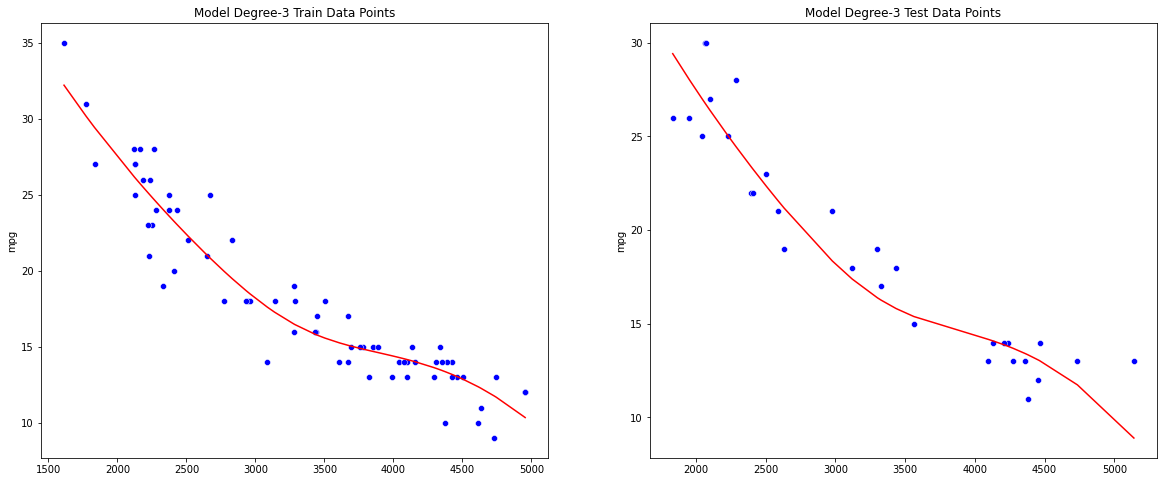

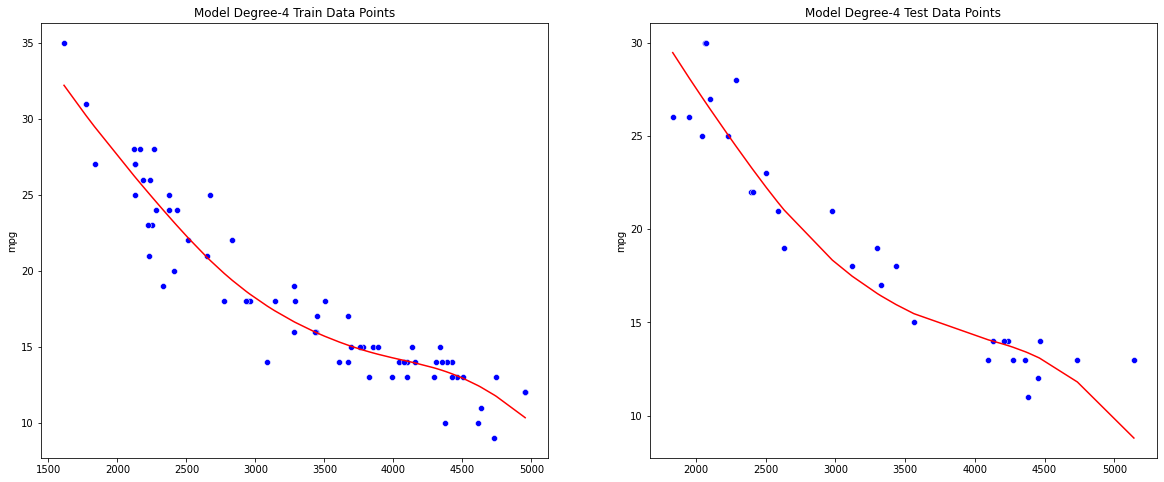

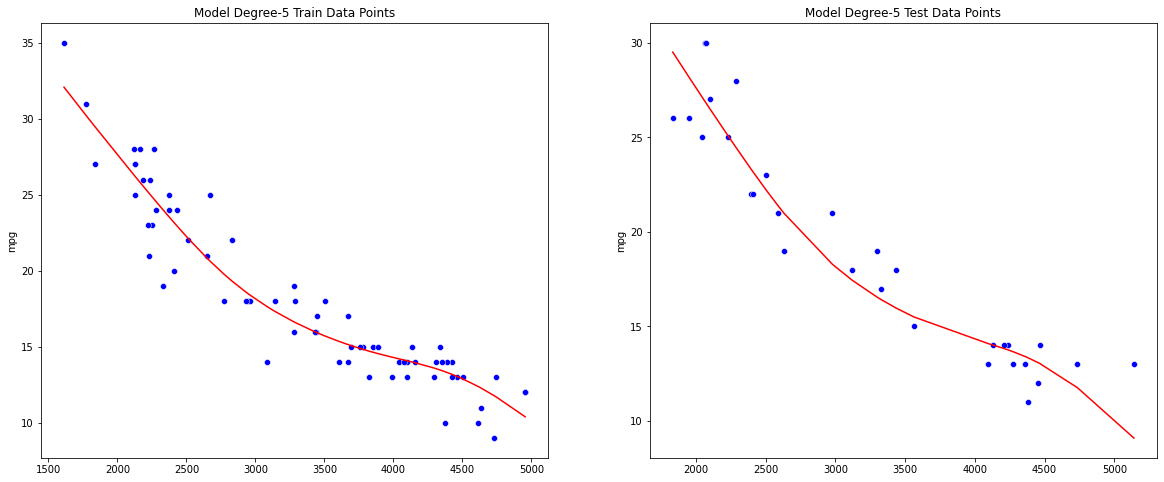

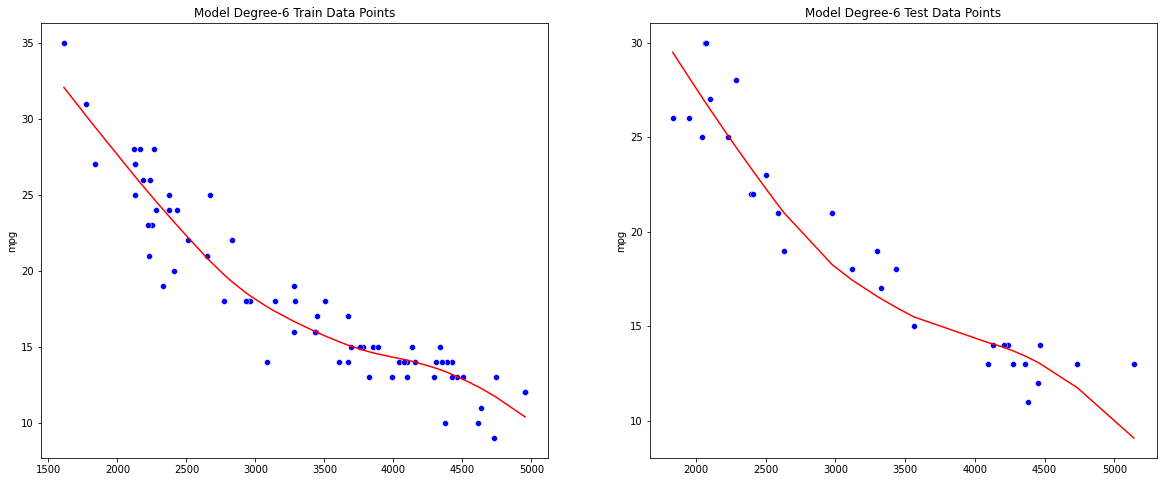

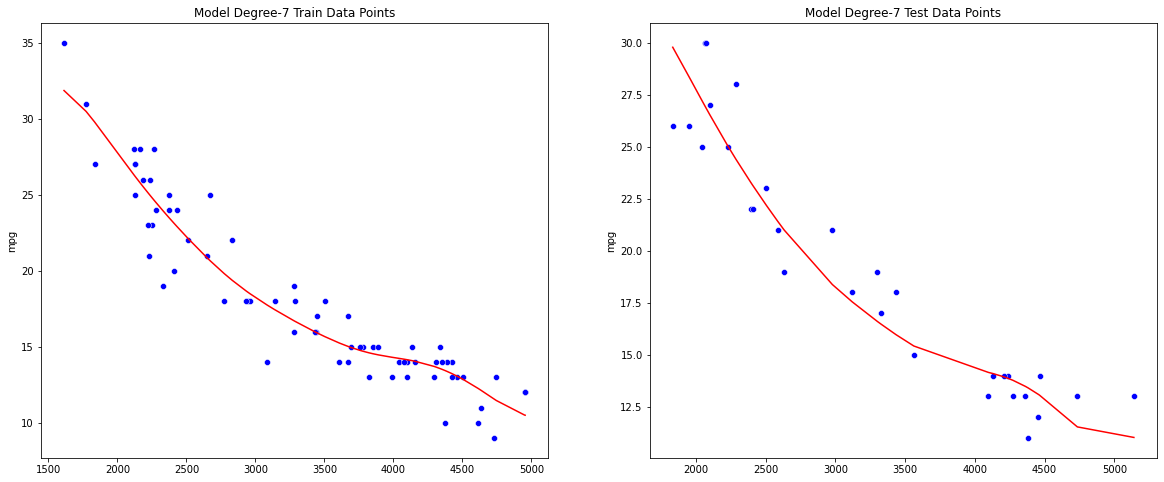

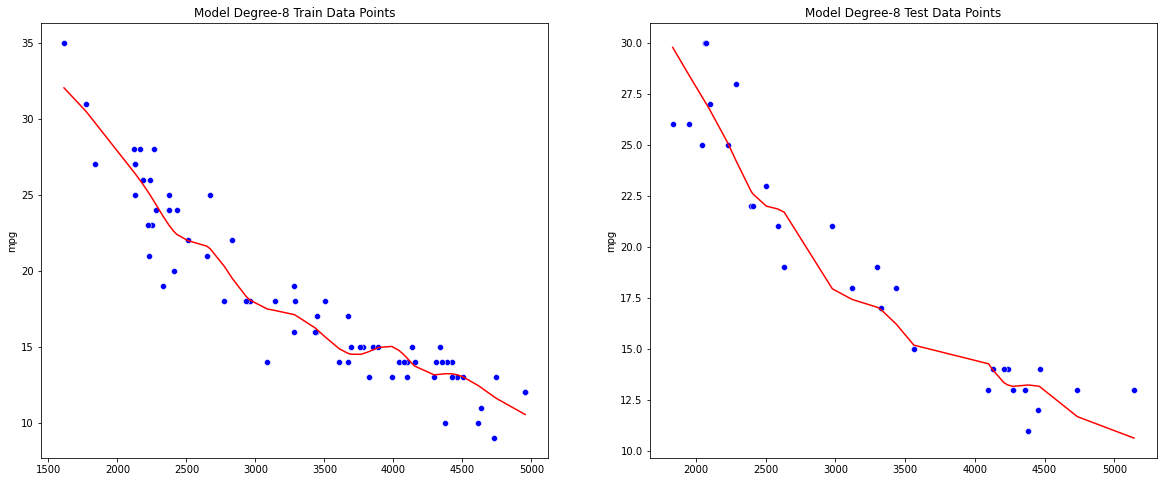

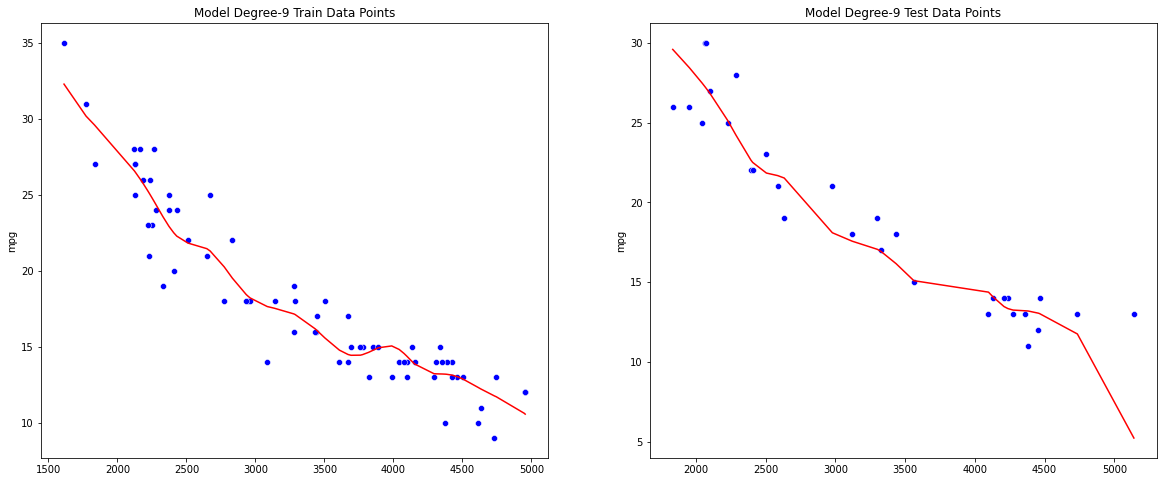

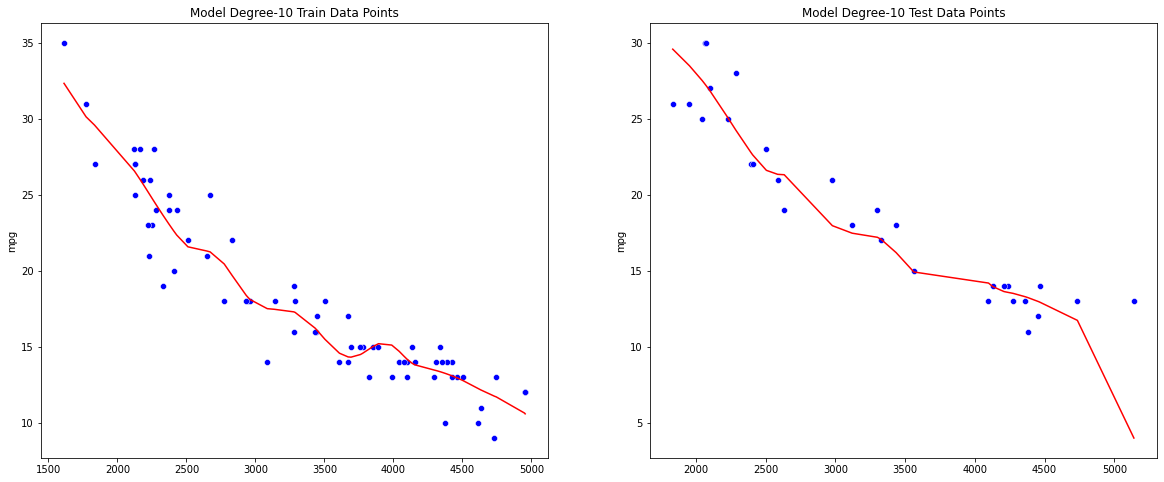

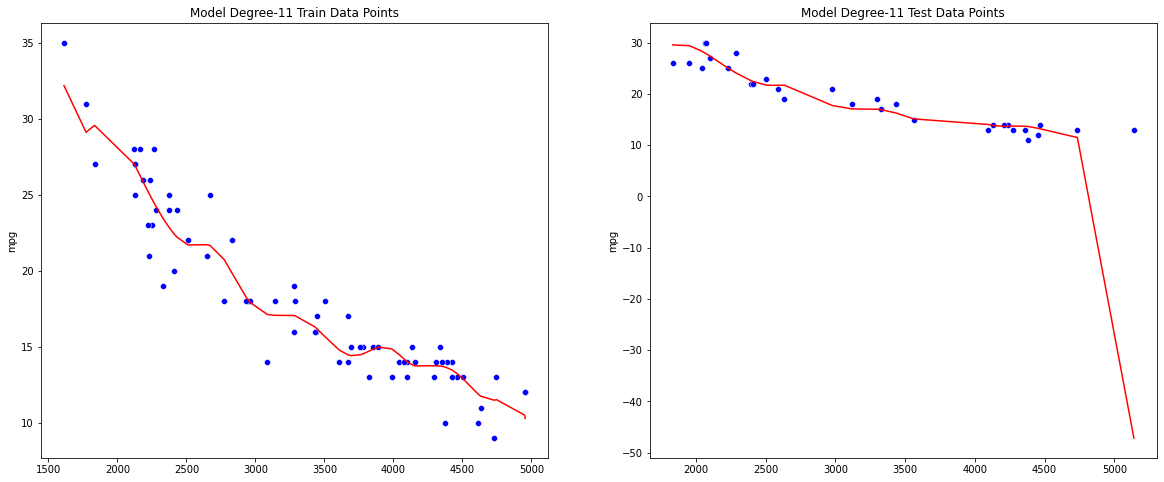

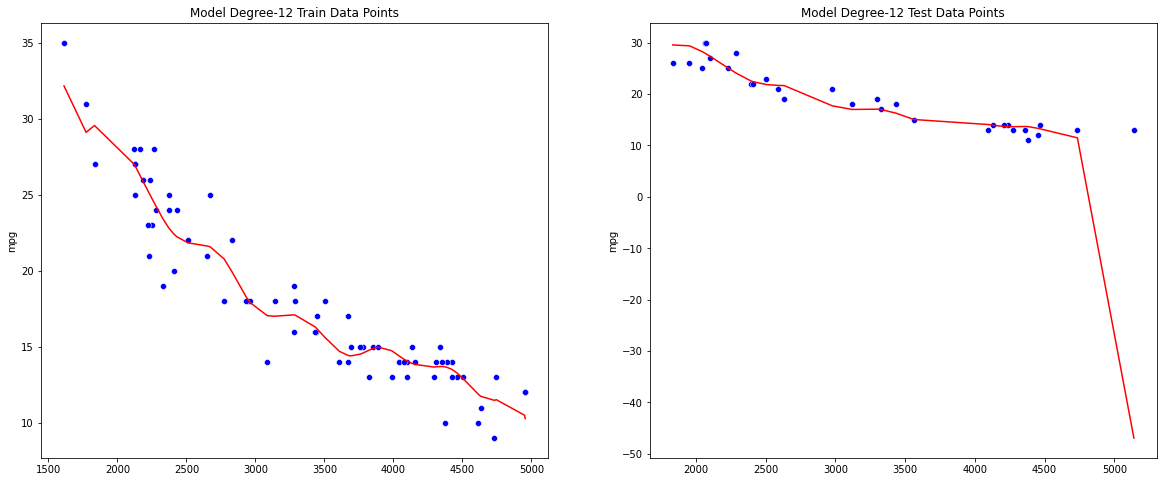

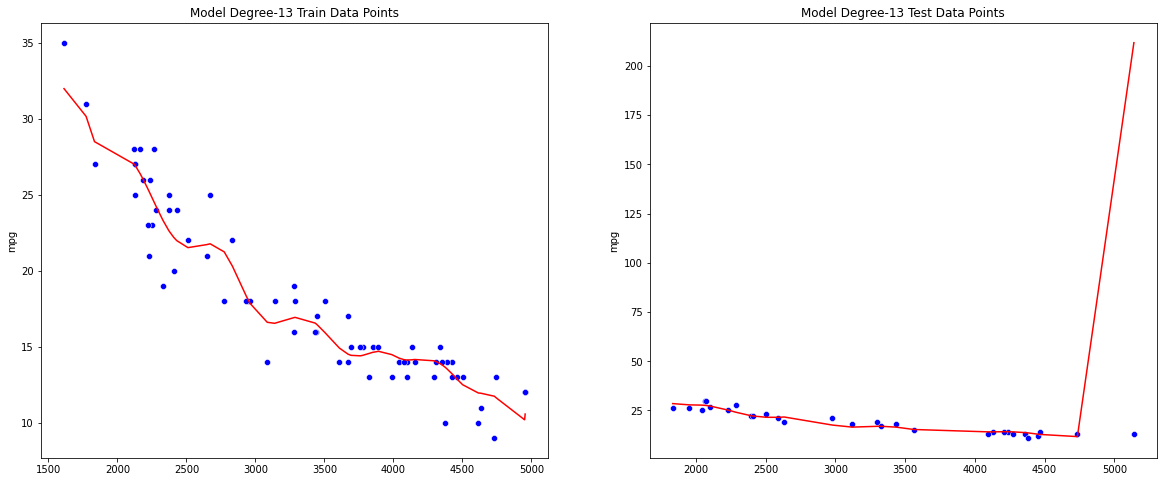

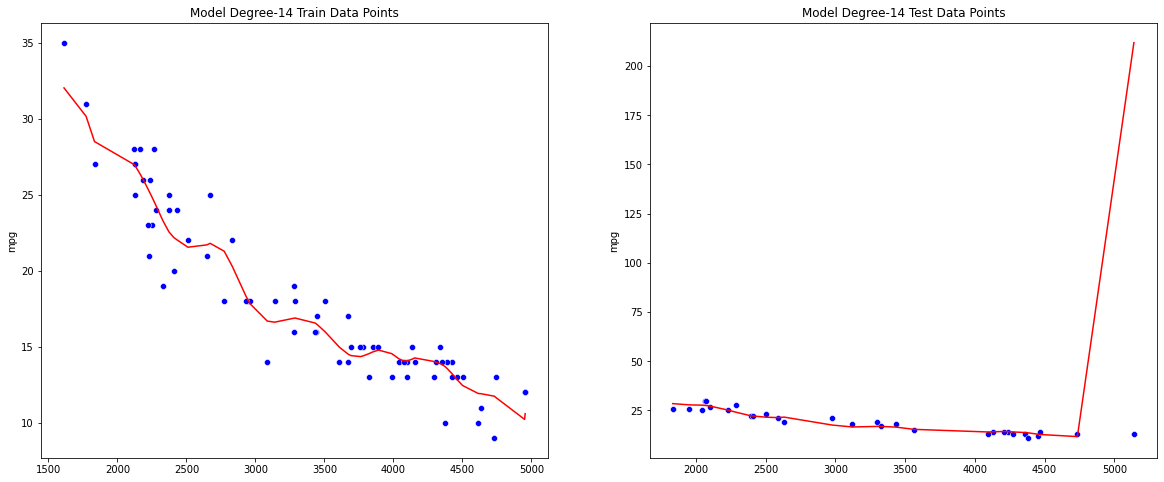

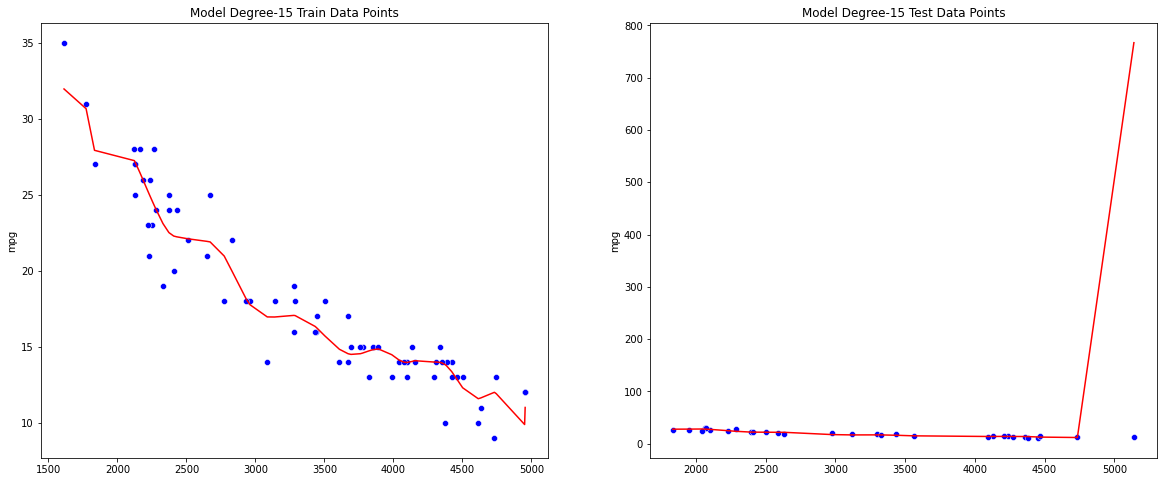

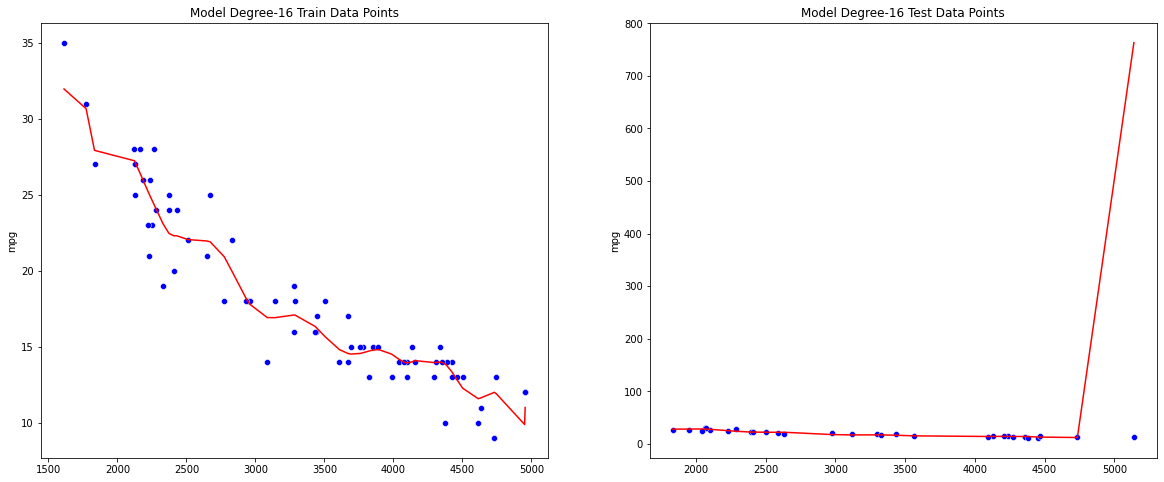

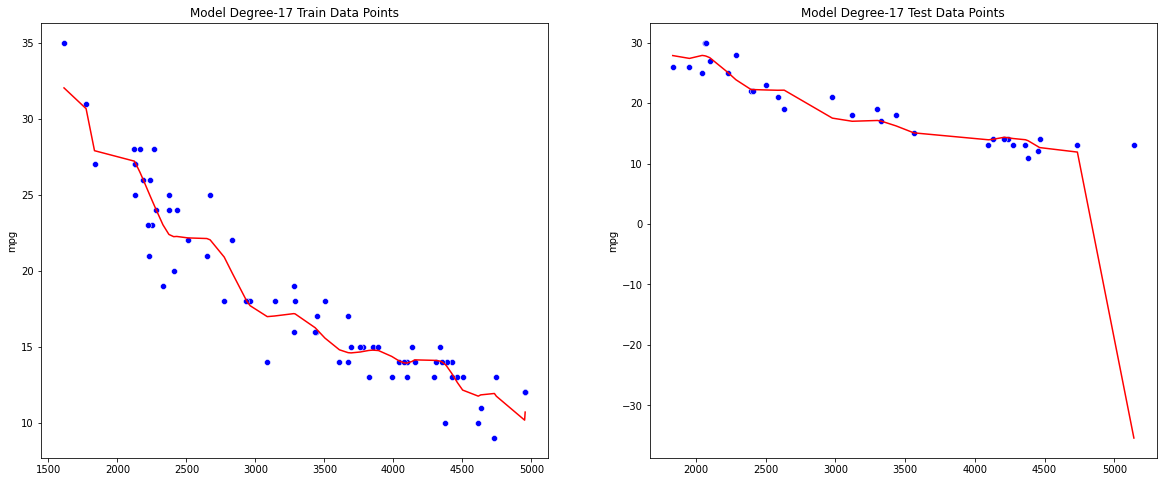

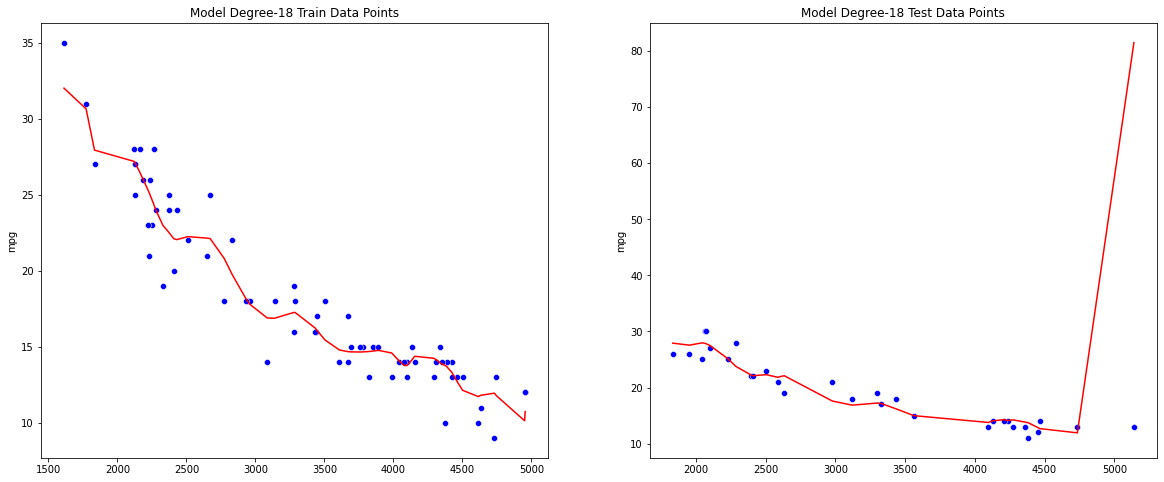

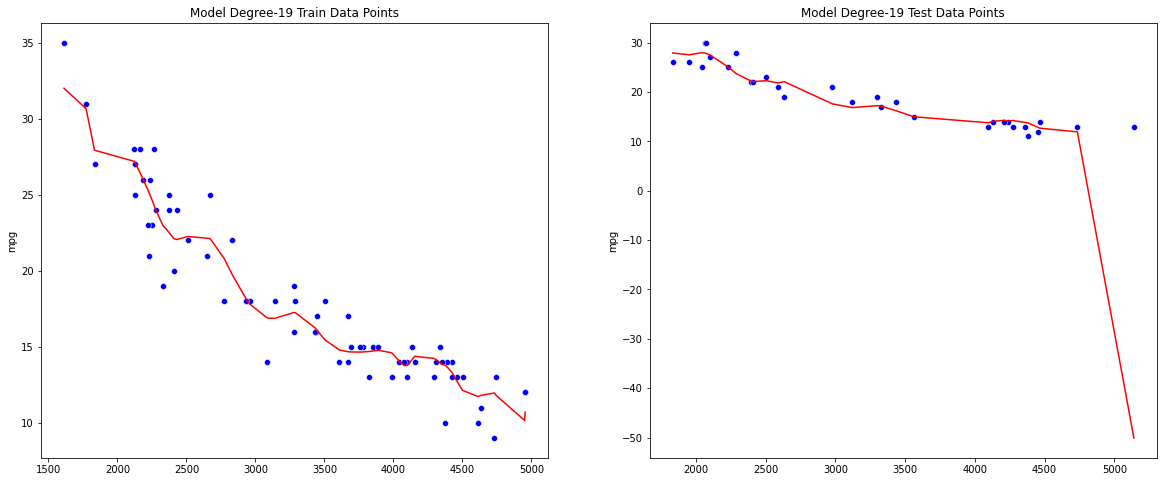

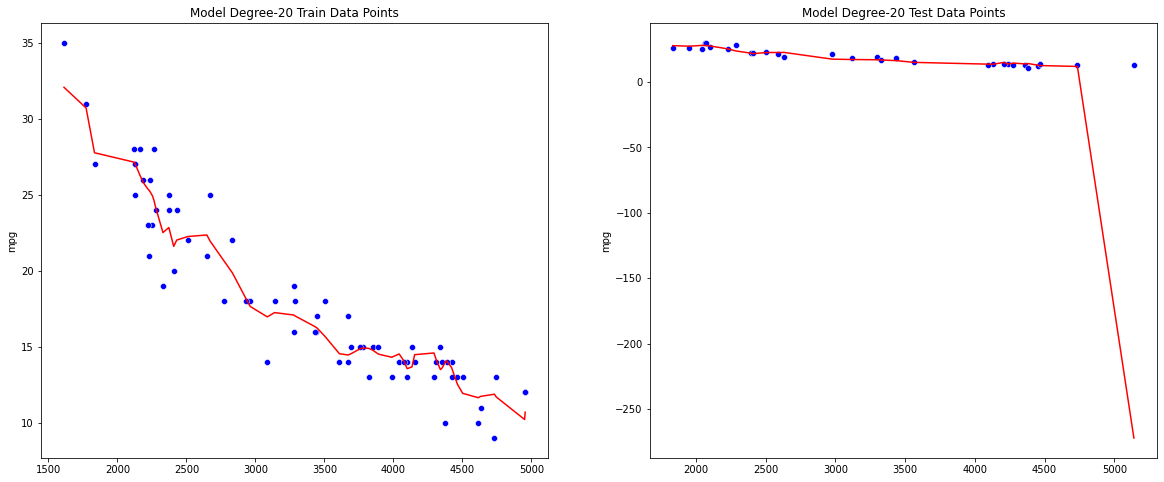

In [276]:
for i in range(20):
    polynomial_models_with_transformation(i+1)

******** Polynomial Model with Degree= 100  ********


Coefficients=  [[ 3.74310969e+01 -9.73605611e+02 -4.05510113e+03  9.60296698e+04
   2.08665727e+05 -4.76055274e+06 -5.96849376e+06  1.31143031e+08
   1.00154059e+08 -2.22899390e+09 -1.03614100e+09  2.50009569e+10
   6.77121572e+09 -1.92390644e+11 -2.75788490e+10  1.03414264e+12
   6.41499209e+10 -3.87478470e+12 -5.95009161e+10  9.81569641e+12
  -1.39254711e+10 -1.52802608e+13 -3.05444821e+11  9.80258227e+12
   1.88222844e+12  8.79917200e+12 -3.77488792e+12 -1.50628493e+13
   2.47127690e+12 -1.08244806e+13  1.78351214e+12  2.71758453e+13
  -2.49497199e+12  3.36718963e+12 -6.46109987e+11 -1.91710879e+13
   4.93387794e+11 -1.20311502e+13  1.02192249e+12  1.07235978e+13
  -1.89145383e+11  1.20579451e+13  1.16014128e+12  7.62884126e+12
  -7.76870506e+11 -5.55884420e+12 -1.15179924e+12 -8.94248731e+12
  -1.09251397e+12 -1.48273399e+13  4.65959599e+11 -4.26138041e+12
   8.94523697e+11  1.90503213e+13  1.48903181e+12  9.12070770e+12
   5.1

(100, 0.9820086916372215, -4.803467847933136e+28, 1.621650745462227e+30)

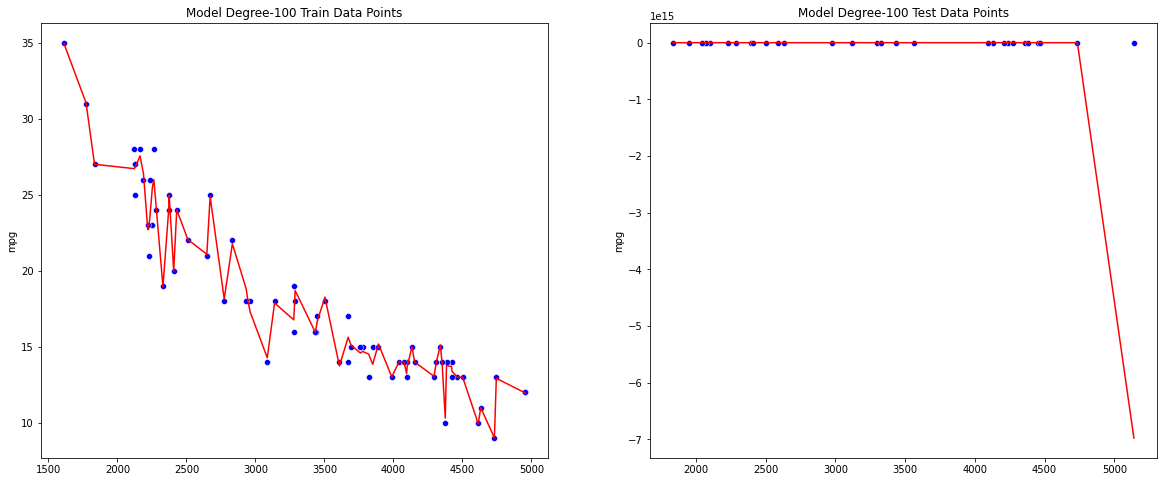

In [277]:
polynomial_models_with_transformation(100)

******** Polynomial Model with Degree= 200  ********


Coefficients=  [[ 2.22279162e+01 -1.01492315e+03 -2.46863637e+03  1.11089849e+05
   1.10858263e+05 -5.88589774e+06 -2.81265923e+06  1.68402153e+08
   4.50182561e+07 -2.90243279e+09 -5.22453735e+08  3.23292168e+10
   4.90783133e+09 -2.42432786e+11 -3.76288222e+10  1.24690122e+12
   2.21406429e+11 -4.38547967e+12 -9.44211541e+11  1.01939058e+13
   2.80418492e+12 -1.40825851e+13 -5.52301387e+12  7.26910010e+12
   6.43663456e+12  6.91525106e+12 -2.68896629e+12 -6.66992585e+12
  -2.54998610e+12 -9.68848665e+12  2.16619847e+12  8.72213484e+12
   1.78188476e+12  7.05483016e+12 -7.46110455e+11 -9.93830740e+10
  -1.73564143e+12 -6.32138383e+12 -6.53754562e+11 -7.82847703e+12
   8.62280461e+11  1.08023171e+12  1.19694556e+12  5.97606045e+12
   6.84718164e+11  6.34109873e+12 -2.26608726e+11  1.80336694e+12
  -9.04999236e+11 -1.98515458e+12 -9.27420778e+11 -4.48284436e+12
  -4.26870982e+11 -5.72713575e+12  1.26616870e+11 -1.44424624e+12
   6.1

(200, 0.9881527002552712, -2.7950797303600795e+39, 9.436189169695628e+40)

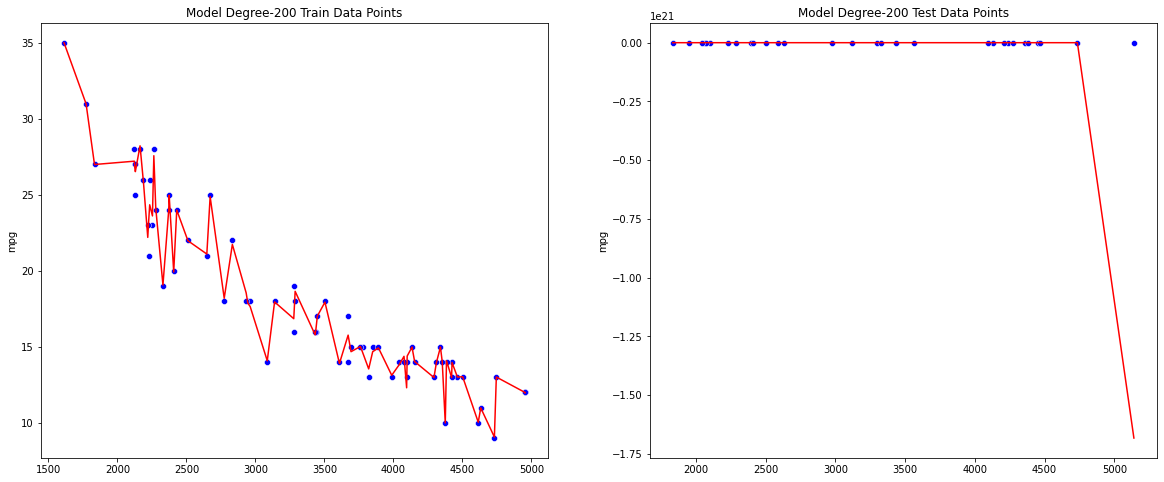

In [279]:
polynomial_models_with_transformation(200)

In [280]:
def polynomial_models_with_transformation_without_plots(d):
    
    
    #polynomial features
    poly=PolynomialFeatures(degree=d, include_bias=False)
    poly.fit(X_train)
    X_train_poly=poly.transform(X_train)
    
    #normalization
    pt=PowerTransformer()
    pt.fit(X_train_poly)
    X_train_poly=pt.transform(X_train_poly)
    
    
    #model
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,y_train)
    
    
    
    #print('******** Polynomial Model with Degree=',d,' ********\n\n')
    
    #print('Coefficients= ',poly_model.coef_)
    
    #print('Intercept= ',poly_model.intercept_)
    
    
    #plt.figure(figsize=(20,8))
    
    
    score_train_dataset=poly_model.score(X_train_poly,y_train);
    
    
    #print('\n\nScore on train-dataset= ',score_train_dataset,'\n\n')
    
    #plt.subplot(1,2,1)
    
    #plt.title('Train Data Points')
    
    #sns.scatterplot(X_train_unscaled, y_train['mpg']);
    
    #sns.lineplot(X_train_unscaled, poly_model.predict(X_train_poly).flatten(),color='red');
    
    
    
    
    
    X_test_poly= pt.transform(poly.transform(X_test))
    
    
    
    score_test_dataset=poly_model.score(X_test_poly,y_test);
    
    mse_test_dataset=mean_squared_error(y_test,poly_model.predict(X_test_poly));
    
    #print('Score on test-dataset= ',score_test_dataset,'\n\n')
    
    #plt.subplot(1,2,2)
    
    #plt.title('Test Data Points')
    
    #sns.scatterplot(X_test_unscaled, y_test['mpg']);
    
    #sns.lineplot(X_test_unscaled, poly_model.predict(X_test_poly).flatten(),color='red');
    
    
    return d,score_train_dataset,score_test_dataset,mse_test_dataset


In [281]:
degree=[]
score_on_train_dataset=[]
score_on_test_dataset=[]
MSE_on_test_dataset=[]
for i in range(200):
    d,s1,s2,mse=polynomial_models_with_transformation_without_plots(i+1)
    degree.append(d)
    score_on_train_dataset.append(s1)
    score_on_test_dataset.append(s2)
    MSE_on_test_dataset.append(mse)


# Dataset training_score, test_score, mse_on_test_dataset

In [282]:
np.var(y_test)

mpg    33.76
dtype: float64

In [283]:
scores_df=pd.DataFrame({'Degree':degree,'Training_score':score_on_train_dataset,'Testing_score':score_on_test_dataset,'MSE_Test_dataset':MSE_on_test_dataset})
scores_df

,Degree,Training_score,Testing_score,MSE_Test_dataset
0,1,0.843544,8.673678e-01,4.477664e+00
1,2,0.900271,9.098806e-01,3.042431e+00
2,3,0.906765,8.908211e-01,3.685878e+00
3,4,0.906950,8.925986e-01,3.625871e+00
4,5,0.906998,8.949741e-01,3.545674e+00
...,...,...,...,...
195,196,0.988150,-1.612110e+39,5.442483e+40
196,197,0.988159,-3.471316e+39,1.171916e+41
197,198,0.988108,-4.078176e+40,1.376792e+42
198,199,0.988206,-6.618706e+39,2.234475e+41


In [285]:
scores_df.to_csv('scores.csv',index=False)